SEL Project

Author: Alyssa Weber

11/18/2022

# Statistical Question/Hypothesis

It is my 8th year teaching high school mathematics. Since the pandemic of 2022, I have observed an increase in prioritization in education regarding Social Emotional Learning (SEL). For this final project, I have chosen to use student data from my 2022-2023 classes collected through a education-based social emotional survey named "DESSA". More information about this survey can be found here: [Aperture Information](https://apertureed.com/dessa/). 

I would like to know if there is a certain strand of SEL data that generally predicts the overal SEL composite score of a student. Although each student is unique when it comes to their social needs, I wonder if focusing on a particular strand within the classroom would result in an increase of overall SEL composite scores. For the purposes of statistical analysis, I will focus on one strand. 

Do Relationship Skill scores (RS) impact the SEC composite score?

# Data Selection and Cleaning

In [2]:
# import the student Dessa data and print the column headers
import pandas as pd

sel_df = pd.read_csv("SELData.csv")
for col in sel_df.columns:
  print(col)

Student
Attachments
smartFORMS
Comments
Tags
Interventions
 DM TScore-DESSA 
 GB TScore-DESSA 
 PR TScore-DESSA 
 RS TScore-DESSA 
 SA/OT TScore-DESSA 
 SEC TScore-DESSA 
 SM TScore-DESSA 
 SO TScore-DESSA 


For anonymity and because I am interested in general trends rather than 
individual data points, I will remove the "Student" column. 

Previously looking through the data, I observed that columns names "Attachements", "smartFORMS", "Comments", and "Interventions" have no data entries other than a 0 or null and will therefore also be removed. 

The following columns of interest for this project include:

1.   Tags
> Tags include values of "AVID Enrolled 2022-2023", "College Level Course Enrolled 2021-2022", or NaN. Although the Tags are used spariningly, it may provide insight into SEL scores. I will keep this column in the final data frame, but will need to perform some data cleaning for it to be useful data.


The remaining columns are all Dessa Scores. It is important to note that the scores should range from 0-100 and were derived from a self-reported survey that each student took. Not all students took this survey due to absences, refusal, or other factors. A score of 0-41 indicates that a student needs instruction. A score of 41-61 is considered typical. A score of 61-100 is considered a strength. Each of these columns uses an abbreviated name. When building the project data frame I plan on renaming these variables. Because I am interested in finding a strand that best predicts the composite score, I will keep all of the following variables. 

2. DM TScore-DESSA stands for Decision Making
3. GB TScore-DESSA stands for Goal-Directed Behavior
4. PR TScore-DESSA stands for Personal Responsibility
5. RS TScore-DESSA stands for Relationship Skills
6. SA/OT TScore-DESSA stands for Self-Awareness/Optimistic Thinking
7. SEC TScore-DESSA stands for Composite (or overall) Score
8. SM TScore-DESSA stands for Self-Management
9. SO TScore-DESSAstands for Social Awareness








In [3]:
# remove unnecessary columns from the data frame
del sel_df["Student"]
del sel_df["Attachments"]
del sel_df["smartFORMS"]
del sel_df["Comments"]
del sel_df["Interventions"]



In [4]:
# rename the columns

sel_df = sel_df.rename(columns={" DM TScore-DESSA ": "DM", 
                                " GB TScore-DESSA ": "GB", 
                                " PR TScore-DESSA ": "PR", 
                                " RS TScore-DESSA ": "RS", 
                                " SA/OT TScore-DESSA ": "SA/OT", 
                                " SEC TScore-DESSA ": "SEC", 
                                " SM TScore-DESSA ": "SM", 
                                " SO TScore-DESSA ": "SO" })


In [5]:
# update the Column "Tags" inputs
## NAN - change to a value of zero
## AVID Enrolled 2022-2023 - change to a value of 1
## College Level Course Enrolled 2021-2022 - change to a value of 2

sel_df = sel_df.fillna(0)
sel_df['Tags'] = sel_df['Tags'].replace(['AVID Enrolled 2022-2023'], int(1))
sel_df['Tags'] = sel_df['Tags'].replace(['College Level Course Enrolled 2021-2022'], int(2))


In [6]:
#preview the revised data frame
print(sel_df.head())
print(sel_df.tail())

   Tags    DM    GB    PR    RS  SA/OT   SEC    SM    SO
0     0  36.0  41.0  33.0  38.0   42.0  37.0  42.0  35.0
1     0  33.0  41.0  41.0  41.0   42.0  40.0  39.0  48.0
2     0  28.0  34.0  37.0  48.0   32.0  34.0  37.0  35.0
3     0  29.0  45.0  39.0  38.0   48.0  41.0  50.0  44.0
4     0  39.0  41.0  37.0  41.0   42.0  42.0  47.0  52.0
    Tags     DM     GB     PR     RS  SA/OT    SEC     SM    SO
89     0  61.00  43.00  37.00  64.00  52.00  53.00  67.00  48.0
90     0  67.00  68.00  67.00  64.00  71.00  72.00  67.00  64.0
91     0  64.00  65.00  56.00  56.00  56.00  62.00  65.00  64.0
92     0  67.00  53.00  56.00  64.00  71.00  64.00  65.00  60.0
93     0  43.77  43.26  43.78  46.88  44.78  43.81  44.58  45.6


In [7]:
# delete the last row since it displays student averages
sel_df = sel_df.drop(labels=93, axis=0)

In [8]:
#preview the revised data frame again
print(sel_df.head())
print(sel_df.tail())

   Tags    DM    GB    PR    RS  SA/OT   SEC    SM    SO
0     0  36.0  41.0  33.0  38.0   42.0  37.0  42.0  35.0
1     0  33.0  41.0  41.0  41.0   42.0  40.0  39.0  48.0
2     0  28.0  34.0  37.0  48.0   32.0  34.0  37.0  35.0
3     0  29.0  45.0  39.0  38.0   48.0  41.0  50.0  44.0
4     0  39.0  41.0  37.0  41.0   42.0  42.0  47.0  52.0
    Tags    DM    GB    PR    RS  SA/OT   SEC    SM    SO
88     0  61.0  38.0  29.0  48.0   46.0  45.0  56.0  44.0
89     0  61.0  43.0  37.0  64.0   52.0  53.0  67.0  48.0
90     0  67.0  68.0  67.0  64.0   71.0  72.0  67.0  64.0
91     0  64.0  65.0  56.0  56.0   56.0  62.0  65.0  64.0
92     0  67.0  53.0  56.0  64.0   71.0  64.0  65.0  60.0


# Histograms of the Variables

In [9]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Students')

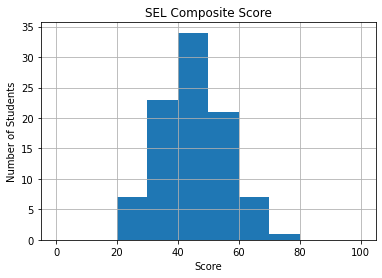

In [10]:
sel_df["SEC"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'SEL Composite Score',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

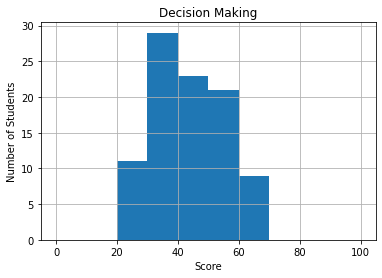

In [11]:
sel_df["DM"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Decision Making',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

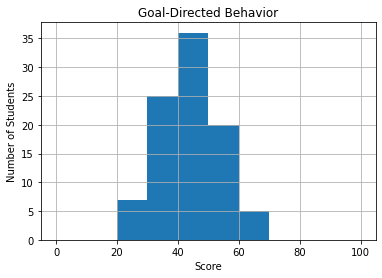

In [12]:
sel_df["GB"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Goal-Directed Behavior',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

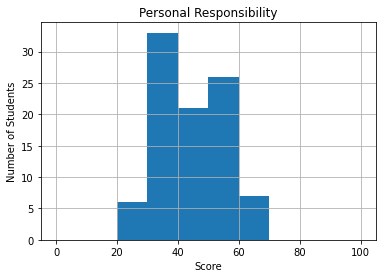

In [13]:
sel_df["PR"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Personal Responsibility',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

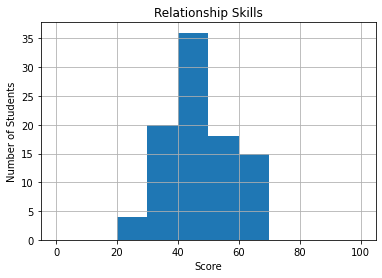

In [14]:
sel_df["RS"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Relationship Skills',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

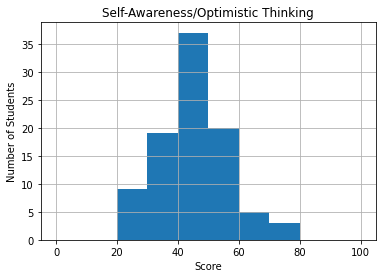

In [15]:
sel_df["SA/OT"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Self-Awareness/Optimistic Thinking',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

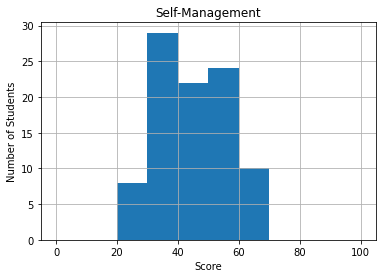

In [16]:
sel_df["SM"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Self-Management',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

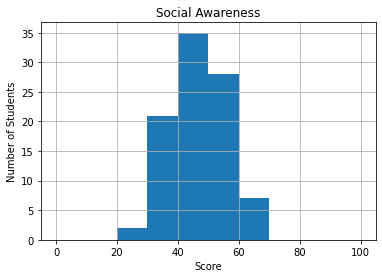

In [17]:
sel_df["SO"].plot(kind = 'hist',
        bins = 10,
        range = (0,100),
        title = 'Social Awareness',
        grid = True)
plt.xlabel('Score')
plt.ylabel('Number of Students')

# Descriptive Characteristics

In [18]:
sel_df.describe()

,Tags,DM,GB,PR,RS,SA/OT,SEC,SM,SO
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,0.268817,43.774194,43.258065,43.784946,46.881720,44.784946,43.806452,44.580645,45.602151
std,0.627967,11.185325,9.517608,10.245730,9.970445,10.315511,10.133091,10.982518,9.354306
min,0.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
25%,0.000000,33.000000,36.000000,37.000000,38.000000,38.000000,37.000000,35.000000,40.000000
50%,0.000000,44.000000,43.000000,41.000000,48.000000,46.000000,43.000000,45.000000,48.000000
75%,0.000000,51.000000,50.000000,50.000000,56.000000,51.000000,51.000000,53.000000,54.000000
max,2.000000,67.000000,68.000000,67.000000,64.000000,71.000000,72.000000,67.000000,64.000000


# PMF

In [19]:
import seaborn as sns

In [20]:
notag = sel_df[sel_df.Tags == 0]
tag = sel_df[sel_df.Tags != 0]

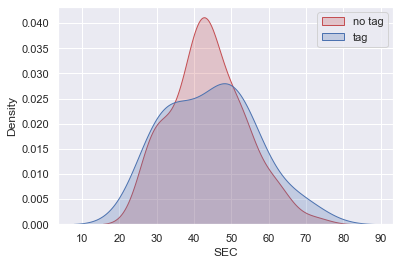

In [21]:
# note this is a density curve, rather than a PMF, but it shows very similar data
# I could not figure out how to split the data and also plot them together in a 
# PMF
sns.set(style="darkgrid")
fig = sns.kdeplot(notag['SEC'], shade=True, color="r", label = "no tag")
fig = sns.kdeplot(tag['SEC'], shade=True, color="b", label = "tag")
plt.legend(loc="upper right")
plt.show()

# CDF

In [22]:
# code sourced from book "Think Stats 2nd Edition" pg 41 
def EvalCdf(t,x):
  count = 0.0
  for value in t:
    if value <= x:
      count += 1

  prob = count/ len(t)
  return prob

In [23]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

Downloaded thinkstats2.py
Downloaded thinkplot.py


In [24]:
import thinkstats2
import thinkplot

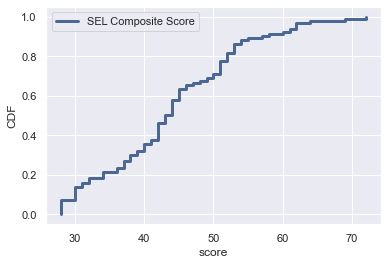

<Figure size 576x432 with 0 Axes>

In [25]:
sec_cdf = thinkstats2.Cdf(sel_df.SEC, label = 'SEL Composite Score')
thinkplot.Cdf(sec_cdf)
thinkplot.Show(xlabel = 'score', ylabel = 'CDF')

The curve of SEL composite scores appear to be skewed slightly right. This might make it more difficult to predict values of students in a larger population. From this graph we can comfirm the median is around 43 points, the max is abnout 73, and the min is about 28. 

# Analytical Distribution

In [26]:
# code edited from book "Think Stats 2nd Edition" pg 54
def MakeNormalPlot(scores):
    mean = scores.mean()
    std = scores.std()

    xs = [-4,4]
    fxs, fys = thinkstats2.FitLine(xs, inter=mean, slope = std)
    thinkplot.plot(fxs, fys, color = 'gray', label = 'model')

    xs, ys = thinkstats2.NormalProbability(scores)
    thinkplot.Plot(xs, ys, label = 'Dessa Scores')

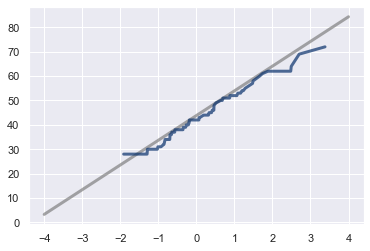

In [27]:
# Normal Probability Plot
# Testing to see if the composite SEL scores shown in the CDF above are normal. 
MakeNormalPlot(sel_df["SEC"])

The composite SEL scores are somewhat normal from values of -1.5 standard deviations until 1.5 standard deviation. It is by no means perfectly fit to a
normal curve. Again, this model shows the data is skewed right. 

# Scatterplots with Analysis

Since I am working with 9 distinct variables, I decided to run a heatmap with correlation to help decide which variables I should put into scatterplots for analysis. 

<AxesSubplot:>

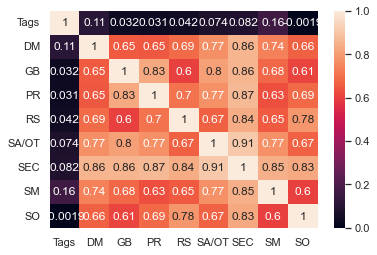

In [28]:
sns.heatmap(sel_df.corr(), annot=True)


My statistical wonderings asks if there are any variables that help predict the SEC variable. More specifically, do Relationship Skill (RS) scores impact SEC composite scores. Based on the heatmap above, I will look more closely at the relationships between SEC (composite scores) compared against SA/OT (Self Awareness/ Optomistic Thinking), since this has the highest correlation, and Relationship S (RS) since this is the area of focus. 

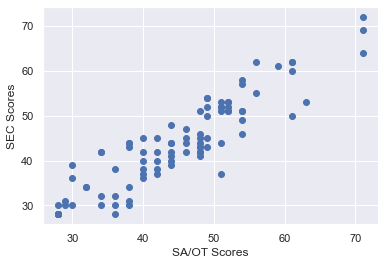

In [29]:
#SEC vs SA/OT
plt.scatter(sel_df["SA/OT"], sel_df["SEC"])
plt.xlabel("SA/OT Scores")
plt.ylabel("SEC Scores")
plt.show()

In [30]:
# Pearson Correlation
corr1 = sel_df['SA/OT'].corr(sel_df['SEC'], method = 'pearson')
print(corr1)

0.908132825255854


In [31]:
# Spearman Correlation
sel_df['SA/OT'].corr(sel_df['SEC'], method = 'spearman')


0.8978807534629646

In [32]:
# Correlation Coefficient
corr1 * corr1

0.8247052283071795

In [33]:
# Covariance
sel_df['SA/OT'].cov(sel_df['SEC'])

94.92531556802244

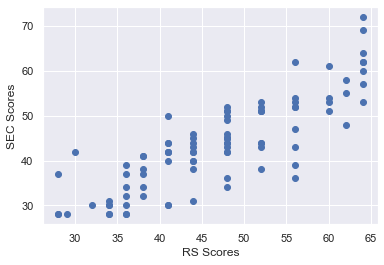

In [34]:
#SEC vs PR
plt.scatter(sel_df["RS"], sel_df["SEC"])
plt.xlabel("RS Scores")
plt.ylabel("SEC Scores")
plt.show()

In [35]:
# Pearson Correlation
corr2 = sel_df['RS'].corr(sel_df['SEC'], method = 'pearson')
print(corr2)

0.8380809685320699


In [36]:
# Spearman Correlation
sel_df['RS'].corr(sel_df['SEC'], method = 'spearman')

0.8403558025365798

In [37]:
# Correlation Coefficient
corr2 * corr2

0.7023797098156523

In [38]:
# Covariance
sel_df['RS'].cov(sel_df['SEC'])

84.67251051893406

Please see the section labeled "Summary and Analysis" for interpretations on the two scatterplots and correlation analyses above. 

# Hypothesis Testing

Statistical Question:


> Null Hypothesis: The RS test scores do not impact the SEC composite scores (There is no correlation between RS test scores and SEC test scores)

> Alternative Hypotheis: The RS test scores impact the SEC composite score





In [39]:
# Run a Pearson Correlation Hypothesis Test
from scipy.stats import pearsonr
data1 = sel_df['RS']
data2 = sel_df['SEC']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

stat=0.838, p=0.000


With a P value < 0.05 we can reject the null hypothesis that the RS score does not impact the SEC composite score. However, we need to be very careful with this result. Since the composite score was built using strand scores, the variables were not independent from the beginning.

# Regression Analysis

In [40]:
# code adapted from book "Think Stats 2nd Edition" pgs 130-131 

# Stats model: Independent variable is RS, Dependent variable is SEC
import statsmodels.formula.api as smf

formula = 'SEC ~ RS'
model = smf.ols(formula, data = sel_df)
results = model.fit()

inter = results.params['Intercept']
slope = results.params['RS']

slope_pvalue = results.pvalues['RS']

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    SEC   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     214.8
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           1.12e-25
Time:                        17:23:39   Log-Likelihood:                -290.47
No. Observations:                  93   AIC:                             584.9
Df Residuals:                      91   BIC:                             590.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8748      2.785      1.391      0.1

# Summary and Analysis

For this project wondered if Relationship Skill scores impact the composite SEC scores using data from the Dessa survey administered to my students in the Fall of 2022. Finding a direct relationship would lead me to experimenting with implementation of relationship skill strategies in my classroom with the hopes of increasing overall social-emotional wellbeing. 


The first analysis was to create basic histograms on the variables to analyze distributions and outliers. Based on the histogram visuals, there are no outliers that need to be considered within the data. Visually, the data does not look quite normal, so caution will need to be taken with further testing and conclusions. 

Next, two scatterplots were created. The first comparison was Self-Awareness/Optimistic Thinking (SA/OT) on the composite SEL score (SEC). The correlation was 0.91 using Pearson's correlation coeeficient. I also calculated Spearman's correlation coefficent, since the previous analysis showed some skewness. The result was 0.90. Both of these values show a strong positive correlation. The covariance value of 94.9 confirmed a positive correlation. I used Pearson's correlation to calculate the correlation coefficient, r^2, on this relationship. The results suggest that SA/OT accounts for 82% of the variation in SEC scores. 

The second scatterplot compared the effects of Relationship Skill scores (RS) on the composite SEL score (SEC). This time both Pearson's correlation and Spearman's correlation calculated at 0.84. Since these values are the same, there is a good chance that a linear model is an adequate choice. The covariance result of 84.7 again confirms a positive correlation. I used Pearson's correlation to calculate the correlation coefficient, r^2, on this relationship as well. The results suggest that RS accounts for 70% of the variation in SEC scores. 

To summarize, neither SA/OT nor RS scores cause the SEC scores, however both are highly correlated and can be used to predict composite scores. 

Lastly, I conducted a hypothesis test using the following hypotheses:

> Null Hypothesis: The RS test scores do not impact the SEC composite scores (There is no correlation between RS test scores and SEC test scores)

> Alternative Hypotheis: The RS test scores impact the SEC composite score

The resulting P-value  of 0.0, which is less than the significant value of 0.05, leads me to reject the null hypothesis that the RS score does not impact the SEC composite score. However, we need to be very careful with this result. Since the composite score was built using strand scores, the variables were not independent from the beginning.


I do not believe there were any missing variables in this analysis. I did make an incorrect assumption, however. From the very beginning, I missed the fact that composite scores were built from strand scores. This led to analysis on variables that were not independent from eachother resulting in skewed or misleading results.

This project was difficult since much of the author's examples were from self-created coding. I spent a significant amount of time researching more widely used methods that were pulled from packages such as seaborn, pandas, matplotlib.pyplot, and scipy.stats. The most challenging section was the analytical distribution from chapter 5. I plan on spending time beyond this course to solidify knowledge in this area.